Импортируем все библиотеки, которые понадабятся далее для работы

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считаем все данные

In [3]:
path = 'data/'  # поменять на свой path
data1 = pd.read_csv(path + 'data1.csv')
data2 = pd.read_csv(path + 'data2.csv')
data3 = pd.read_csv(path + 'data3.csv')
data4 = pd.read_csv(path + 'data4.csv')
data5 = pd.read_csv(path + 'data5.csv')

In [4]:
data1['date'] = pd.to_datetime(data1['date'])
data1.isna().sum() # сентябрь -> август

value    0
date     0
dtype: int64

In [5]:
!python --version

Python 3.12.1


In [6]:
data2  # сентябрь -> август

,value,date
0,332.0,2022-01-01
1,1011.0,2022-01-02
2,1102.0,2022-01-03
3,1065.0,2022-01-04
4,819.0,2022-01-05
...,...,...
969,294.0,2024-08-27
970,258.0,2024-08-28
971,363.0,2024-08-29
972,405.0,2024-08-30


In [7]:
data3  # сентябрь -> август

,value,date
0,455.0,2022-01-01
1,432.0,2022-01-02
2,372.0,2022-01-03
3,384.0,2022-01-04
4,350.0,2022-01-05
...,...,...
969,223.0,2024-08-27
970,200.0,2024-08-28
971,222.0,2024-08-29
972,229.0,2024-08-30


In [8]:
data4  # август -> июль

,date,value
0,2022-01-01,611.0
1,2022-01-02,1858.5
2,2022-01-03,1821.5
3,2022-01-04,1820.5
4,2022-01-05,1698.0
...,...,...
938,2024-07-27,948.5
939,2024-07-28,807.5
940,2024-07-29,468.0
941,2024-07-30,435.0


In [9]:
data5  # август -> июль

,date,value
0,2022-08-01,713.0
1,2022-08-02,788.0
2,2022-08-03,785.0
3,2022-08-04,850.0
4,2022-08-05,904.0
...,...,...
360,2023-07-27,759.0
361,2023-07-28,676.0
362,2023-07-29,863.0
363,2023-07-30,928.0


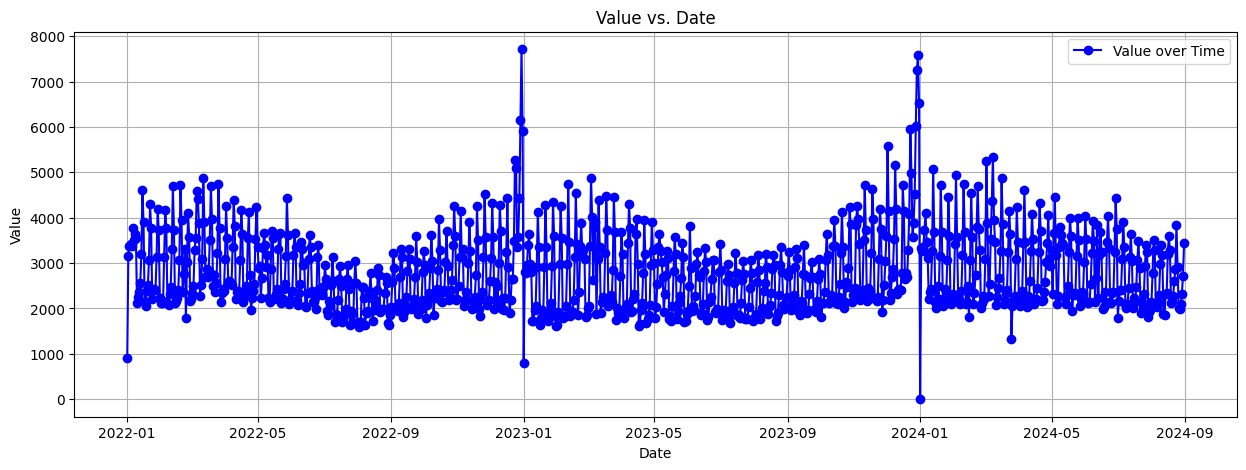

In [10]:
df = pd.DataFrame(data1)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['value'], marker='o', linestyle='-', color='b', label='Value over Time')
plt.title("Value vs. Date")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

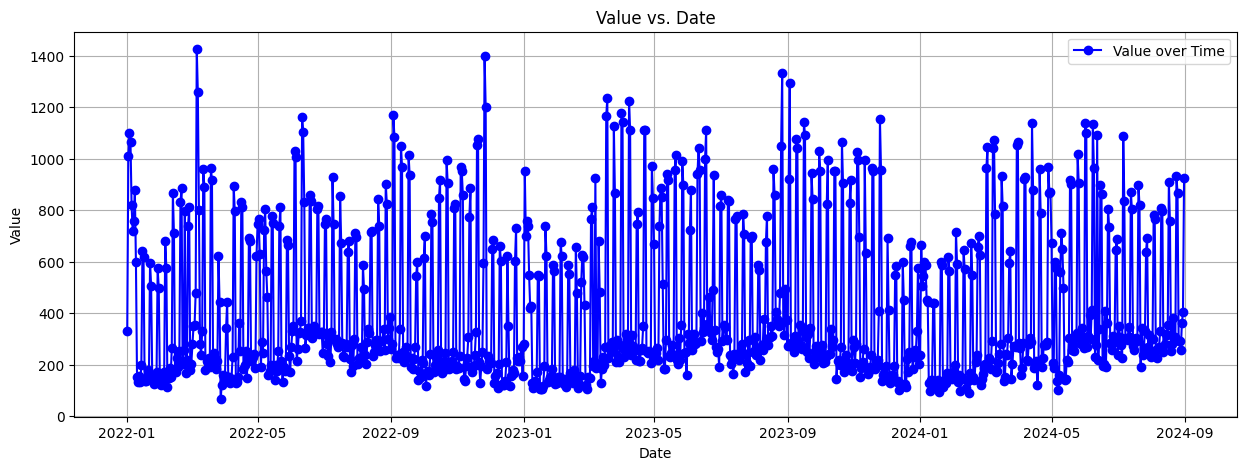

In [11]:
df = pd.DataFrame(data2)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['value'], marker='o', linestyle='-', color='b', label='Value over Time')
plt.title("Value vs. Date")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

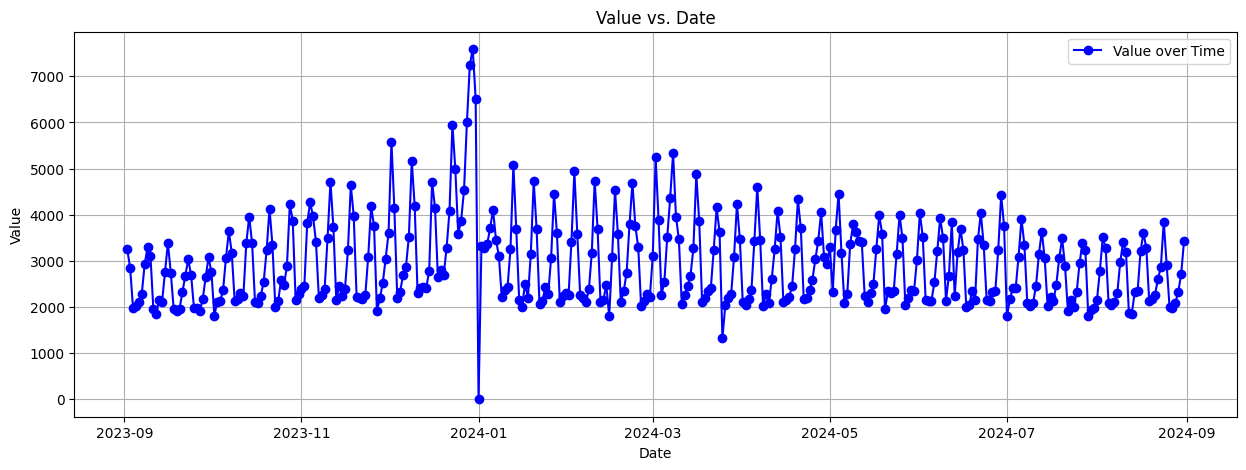

In [19]:
df = pd.DataFrame(data1[-365:])

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['value'], marker='o', linestyle='-', color='b', label='Value over Time')
plt.title("Value vs. Date")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

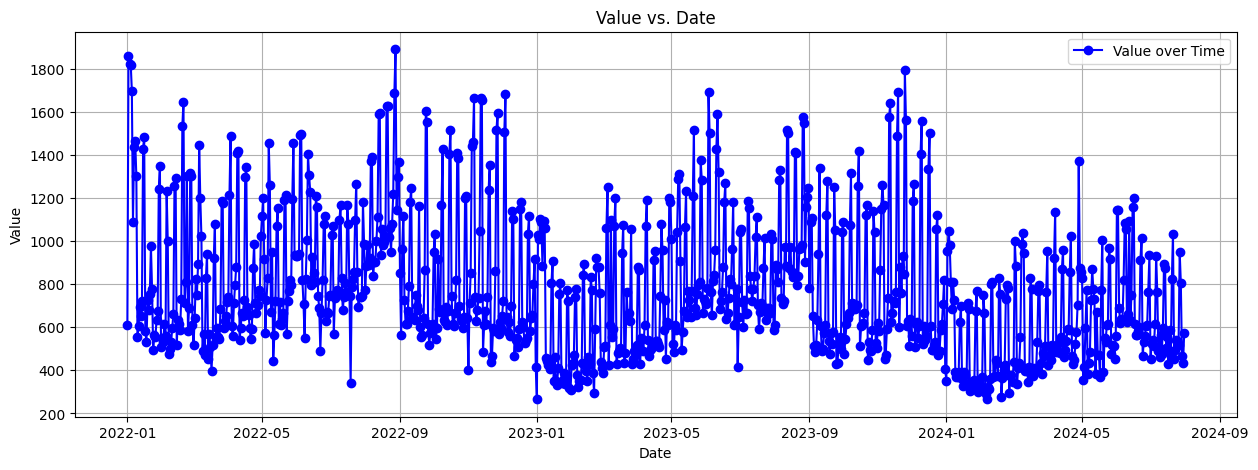

In [13]:
df = pd.DataFrame(data4)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['value'], marker='o', linestyle='-', color='b', label='Value over Time')
plt.title("Value vs. Date")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

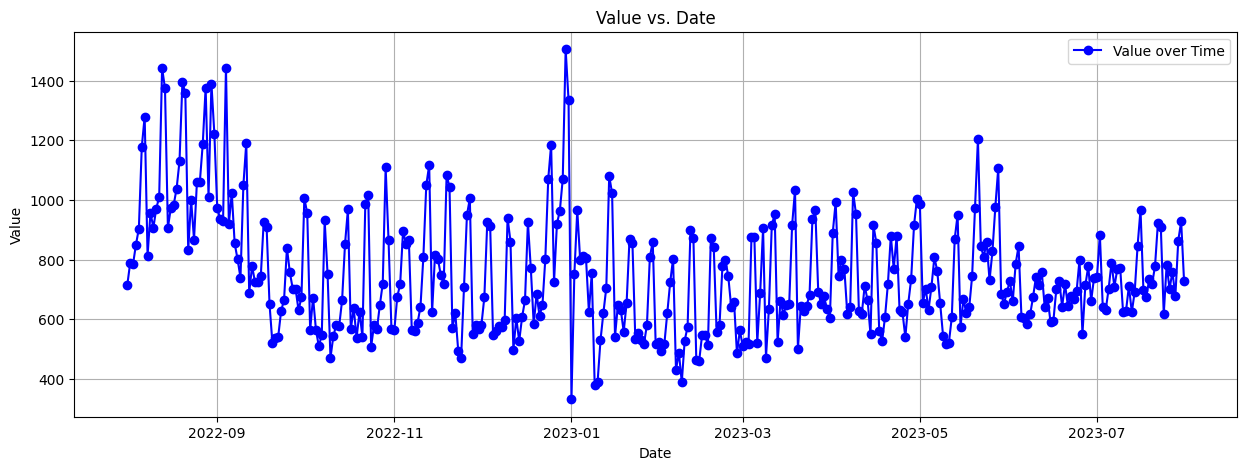

In [14]:
df = pd.DataFrame(data5)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['value'], marker='o', linestyle='-', color='b', label='Value over Time')
plt.title("Value vs. Date")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

c:\Users\redmi\AppData\Local\Programs\Python\Python312\Lib\uni2ts\common\env.py:43: UserWarning: Failed to load .env file.
  warnings.warn("Failed to load .env file.")


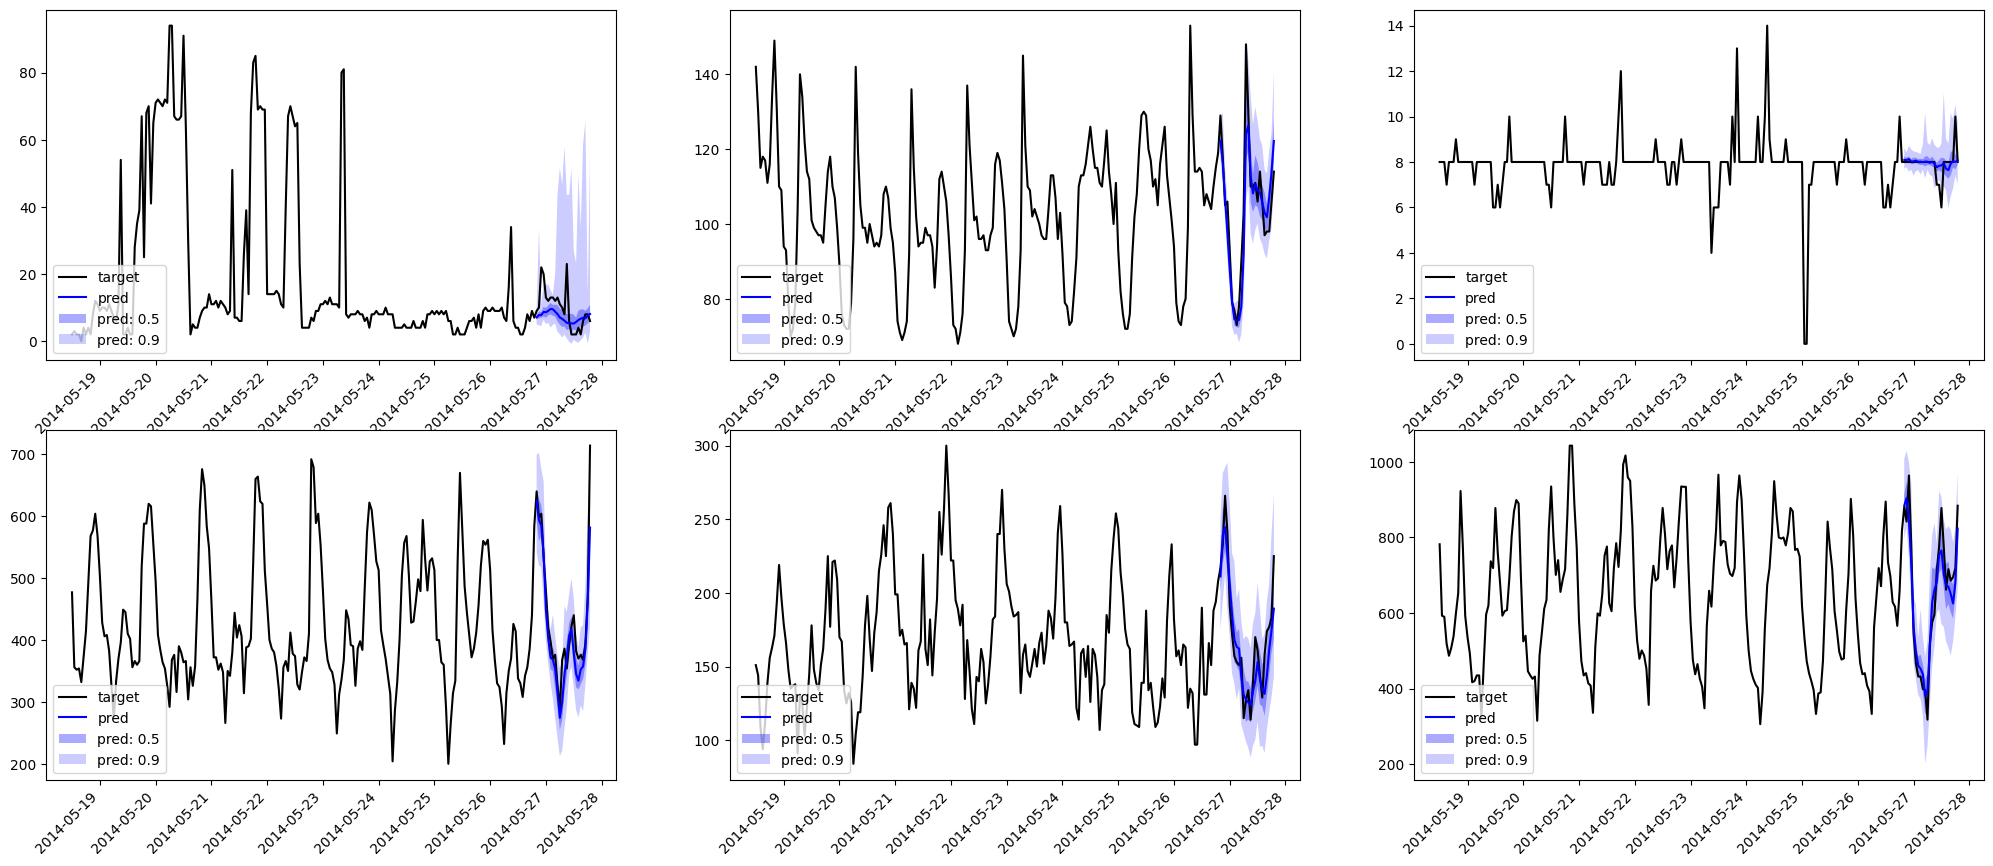

In [15]:
import matplotlib.pyplot as plt
from gluonts.dataset.repository import dataset_recipes

from uni2ts.eval_util.data import get_gluonts_test_dataset
from uni2ts.eval_util.plot import plot_next_multi
from uni2ts.model.moirai_moe import MoiraiMoEForecast, MoiraiMoEModule

SIZE = "small"  # model size: choose from {'small', 'base'}
CTX = 1000  # context length: any positive integer
BSZ = 32  # batch size: any positive integer

# Load dataset
test_data, metadata = get_gluonts_test_dataset(
    "electricity", prediction_length=None, regenerate=False
)
# Uncomment the below line to find other datasets
# print(sorted(dataset_recipes.keys()))

# Prepare model
model = MoiraiMoEForecast(
    module=MoiraiMoEModule.from_pretrained(
        f"Salesforce/moirai-moe-1.0-R-{SIZE}",
    ),
    # mode="autoregressive",
    prediction_length=metadata.prediction_length,
    context_length=CTX,
    patch_size=16,
    num_samples=100,
    target_dim=metadata.target_dim,
    feat_dynamic_real_dim=metadata.feat_dynamic_real_dim,
    past_feat_dynamic_real_dim=metadata.past_feat_dynamic_real_dim,
)

predictor = model.create_predictor(batch_size=BSZ)
forecasts = predictor.predict(test_data.input)

input_it = iter(test_data.input)
label_it = iter(test_data.label)
forecast_it = iter(forecasts)

# Visualize forecasts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
plot_next_multi(
    axes,
    input_it,
    label_it,
    forecast_it,
    context_length=200,
    intervals=(0.5, 0.9),
    dim=None,
    name="pred",
    show_label=True,
)


model.safetensors:  58%|#####8    | 2.18G/3.74G [00:00<?, ?B/s]

c:\Users\redmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gluonts\transform\feature.py:161: RuntimeWarning: invalid value encountered in divide
  ar_res = cumsum / indices.astype(float)


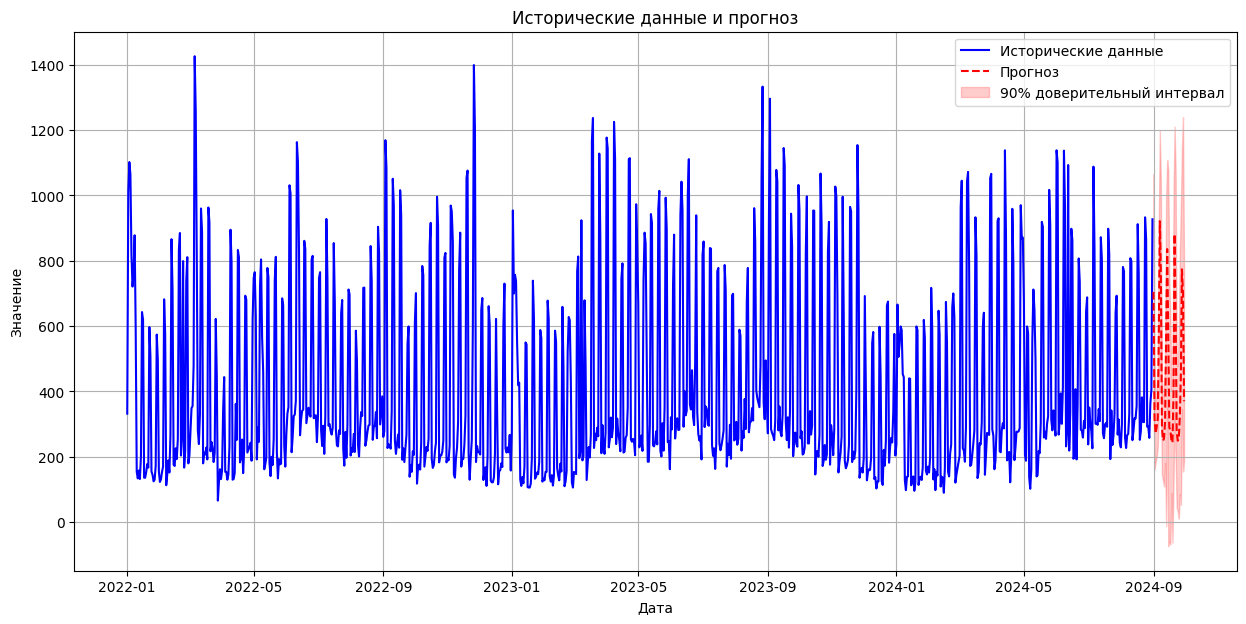

In [15]:
from gluonts.dataset.common import ListDataset
import numpy as np

# Подготовка данных
data2['date'] = pd.to_datetime(data2['date'])
data2

target_values = data2['value'].values
timestamps = data2['date']

# Создаем датасет в формате GluonTS
prediction_length = 30  # прогноз на 30 дней вперед
training_data = ListDataset(
    [
        {
            "target": target_values,
            "start": timestamps[0]
        }
    ],
    freq="D"  # дневная частота
)

# Настройка моделиd
SIZE = "base"
CTX = 1000
BSZ = 32

# Инициализация модели
model = MoiraiMoEForecast(
    module=MoiraiMoEModule.from_pretrained(
        f"Salesforce/moirai-moe-1.0-R-{SIZE}",
    ),
    prediction_length=prediction_length,
    context_length=CTX,
    patch_size=16,
    num_samples=100,
    target_dim=1,  # одномерный временной ряд
    feat_dynamic_real_dim=0,  # нет динамических признаков
    past_feat_dynamic_real_dim=0,  # нет исторических динамических признаков
)

# Создание предиктора и получение прогноза
predictor = model.create_predictor(batch_size=BSZ)
forecasts = list(predictor.predict(training_data))

# Визуализация результатов
plt.figure(figsize=(15, 7))
plt.plot(timestamps, target_values, label='Исторические данные', color='blue')

# Получаем прогноз (берем медиану из всех сэмплов)
forecast_dates = pd.date_range(start=timestamps.iloc[-1], periods=prediction_length + 1, freq='D')[1:]
forecast_values = forecasts[0].mean

plt.plot(forecast_dates, forecast_values, label='Прогноз', color='red', linestyle='--')
plt.fill_between(forecast_dates, 
                 forecasts[0].quantile(0.05), 
                 forecasts[0].quantile(0.95),
                 color='red', alpha=0.2, label='90% доверительный интервал')

plt.title('Исторические данные и прогноз')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

RMSE: 217.39


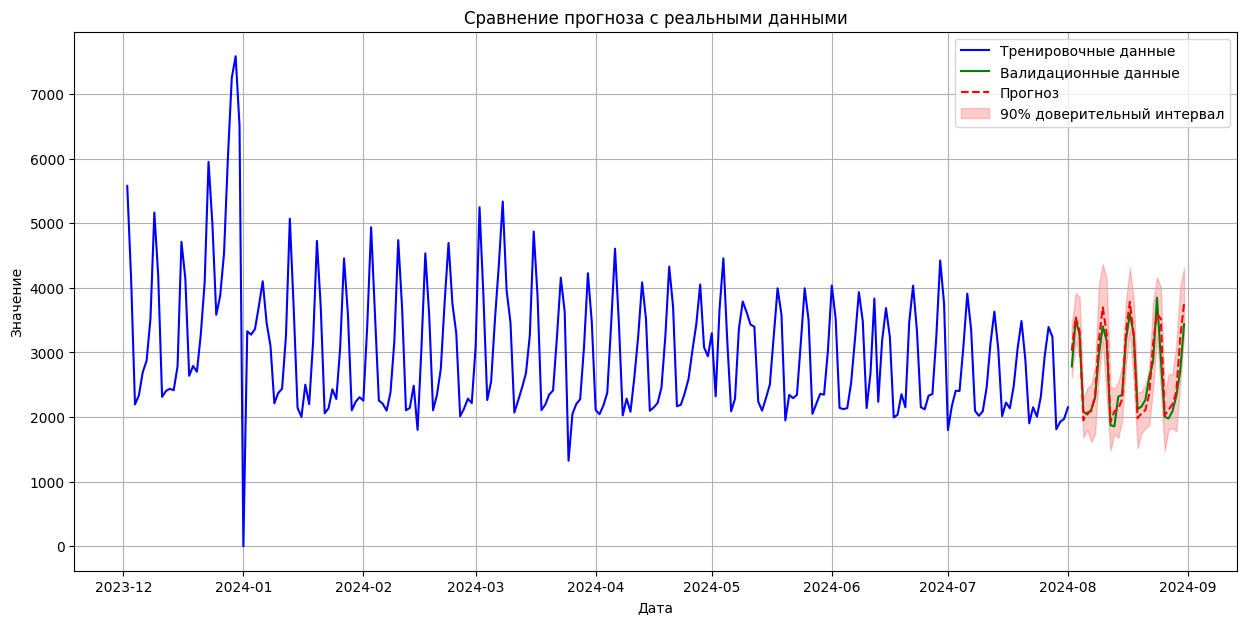

MAPE: 6.25%


In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Разделение данных
valid_length = 30  # последний месяц на валидацию
train_data = data1.iloc[:-valid_length].copy()
valid_data = data1.iloc[-valid_length:].copy()

# Подготовка тренировочных данных для GluonTS
train_values = train_data['value'].values
train_timestamps = train_data['date']

training_data = ListDataset(
    [
        {
            "target": train_values,
            "start": train_timestamps[0]
        }
    ],
    freq="D"
)

# Настройка и обучение модели
model = MoiraiMoEForecast(
    module=MoiraiMoEModule.from_pretrained(
        f"Salesforce/moirai-moe-1.0-R-{SIZE}",
    ),
    prediction_length=valid_length,
    context_length=CTX,
    patch_size=16,
    num_samples=100,
    target_dim=1,
    feat_dynamic_real_dim=0,
    past_feat_dynamic_real_dim=0,
)

# Получение прогноза
predictor = model.create_predictor(batch_size=BSZ)
forecasts = list(predictor.predict(training_data))

# Получение предсказанных значений (среднее по всем сэмплам)
forecast_values = forecasts[0].mean
valid_values = valid_data['value'].values

# Расчет RMSE
rmse = np.sqrt(mean_squared_error(valid_values, forecast_values))
print(f'RMSE: {rmse:.2f}')

# Визуализация результатов
plt.figure(figsize=(15, 7))
# Исторические данные
plt.plot(train_data['date'][700:], train_data['value'][700:], 
         label='Тренировочные данные', color='blue')
# Валидационные данные
plt.plot(valid_data['date'], valid_data['value'], 
         label='Валидационные данные', color='green')
# Прогноз
forecast_dates = pd.date_range(start=train_timestamps.iloc[-1], 
                             periods=valid_length + 1, freq='D')[1:]
plt.plot(forecast_dates, forecast_values, 
         label='Прогноз', color='red', linestyle='--')

# Доверительный интервал
plt.fill_between(forecast_dates, 
                 forecasts[0].quantile(0.05), 
                 forecasts[0].quantile(0.95),
                 color='red', alpha=0.2, 
                 label='90% доверительный интервал')

plt.title('Сравнение прогноза с реальными данными')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Дополнительно выведем относительную ошибку в процентах
mape = np.mean(np.abs((valid_values - forecast_values) / valid_values)) * 100
print(f'MAPE: {mape:.2f}%')

c:\Users\redmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gluonts\transform\feature.py:161: RuntimeWarning: invalid value encountered in divide
  ar_res = cumsum / indices.astype(float)


RMSE: 60.16


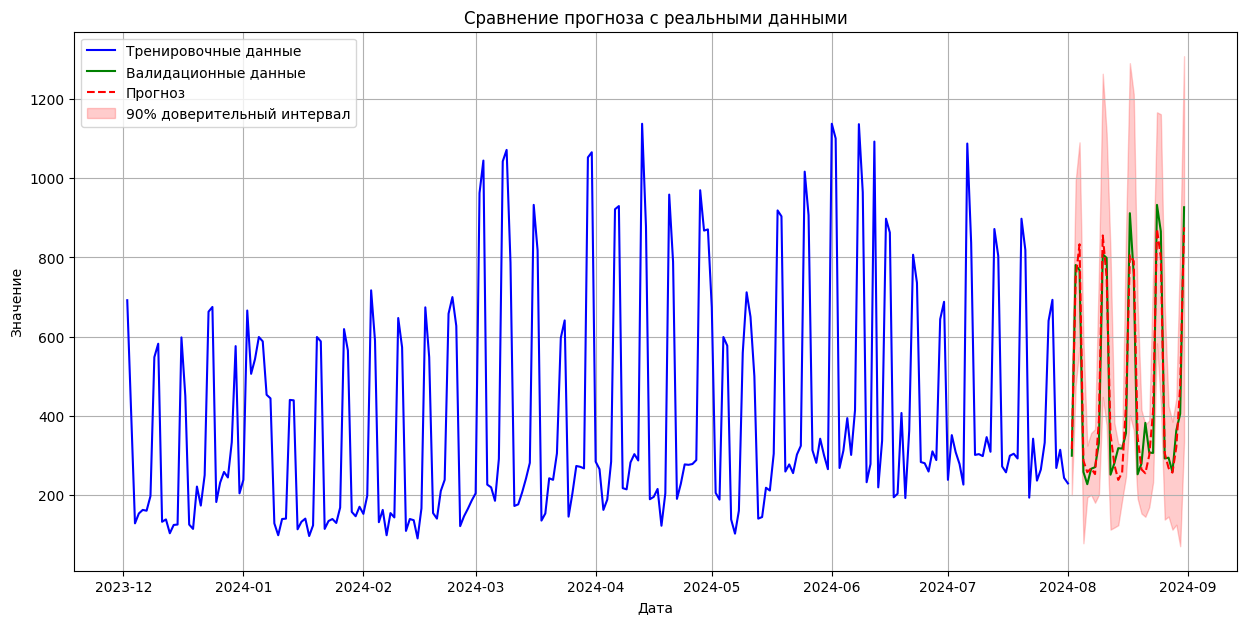

MAPE: 12.59%


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

df = data2.copy()
# Разделение данных
df['date'] = pd.to_datetime(df['date'])
valid_length = 30  # последний месяц на валидацию
train_data = df.iloc[:-valid_length].copy()
valid_data = df.iloc[-valid_length:].copy()

# Подготовка тренировочных данных для GluonTS
train_values = train_data['value'].values
train_timestamps = train_data['date']

training_data = ListDataset(
    [
        {
            "target": train_values,
            "start": train_timestamps[0]
        }
    ],
    freq="D"
)

# Настройка и обучение модели
model = MoiraiMoEForecast(
    module=MoiraiMoEModule.from_pretrained(
        f"Salesforce/moirai-moe-1.0-R-{SIZE}",
    ),
    prediction_length=valid_length,
    context_length=CTX,
    patch_size=16,
    num_samples=100,
    target_dim=1,
    feat_dynamic_real_dim=0,
    past_feat_dynamic_real_dim=0,
)

# Получение прогноза
predictor = model.create_predictor(batch_size=BSZ)
forecasts = list(predictor.predict(training_data))

# Получение предсказанных значений (среднее по всем сэмплам)
forecast_values = forecasts[0].mean
valid_values = valid_data['value'].values

# Расчет RMSE
rmse = np.sqrt(mean_squared_error(valid_values, forecast_values))
print(f'RMSE: {rmse:.2f}')

# Визуализация результатов
plt.figure(figsize=(15, 7))
# Исторические данные
plt.plot(train_data['date'][700:], train_data['value'][700:], 
         label='Тренировочные данные', color='blue')
# Валидационные данные
plt.plot(valid_data['date'], valid_data['value'], 
         label='Валидационные данные', color='green')
# Прогноз
forecast_dates = pd.date_range(start=train_timestamps.iloc[-1], 
                             periods=valid_length + 1, freq='D')[1:]
plt.plot(forecast_dates, forecast_values, 
         label='Прогноз', color='red', linestyle='--')

# Доверительный интервал
plt.fill_between(forecast_dates, 
                 forecasts[0].quantile(0.05), 
                 forecasts[0].quantile(0.95),
                 color='red', alpha=0.2, 
                 label='90% доверительный интервал')

plt.title('Сравнение прогноза с реальными данными')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Дополнительно выведем относительную ошибку в процентах
mape = np.mean(np.abs((valid_values - forecast_values) / valid_values)) * 100
print(f'MAPE: {mape:.2f}%')

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

df = data3.copy()
# Разделение данных
df['date'] = pd.to_datetime(df['date'])
valid_length = 30  # последний месяц на валидацию
train_data = df.iloc[:-valid_length].copy()
valid_data = df.iloc[-valid_length:].copy()

# Подготовка тренировочных данных для GluonTS
train_values = train_data['value'].values
train_timestamps = train_data['date']

training_data = ListDataset(
    [
        {
            "target": train_values,
            "start": train_timestamps[0]
        }
    ],
    freq="D"
)

# Настройка и обучение модели
model = MoiraiMoEForecast(
    module=MoiraiMoEModule.from_pretrained(
        f"Salesforce/moirai-moe-1.0-R-{SIZE}",
    ),
    prediction_length=valid_length,
    context_length=CTX,
    patch_size=16,
    num_samples=100,
    target_dim=1,
    feat_dynamic_real_dim=0,
    past_feat_dynamic_real_dim=0,
)

# Получение прогноза
predictor = model.create_predictor(batch_size=BSZ)
forecasts = list(predictor.predict(training_data))

# Получение предсказанных значений (среднее по всем сэмплам)
forecast_values = forecasts[0].mean
valid_values = valid_data['value'].values

# Расчет RMSE
rmse = np.sqrt(mean_squared_error(valid_values, forecast_values))
print(f'RMSE: {rmse:.2f}')

# Визуализация результатов
plt.figure(figsize=(15, 7))
# Исторические данные
plt.plot(train_data['date'], train_data['value'], 
         label='Тренировочные данные', color='blue')
# Валидационные данные
plt.plot(valid_data['date'], valid_data['value'], 
         label='Валидационные данные', color='green')
# Прогноз
forecast_dates = pd.date_range(start=train_timestamps.iloc[-1], 
                             periods=valid_length + 1, freq='D')[1:]
plt.plot(forecast_dates, forecast_values, 
         label='Прогноз', color='red', linestyle='--')

# Доверительный интервал
plt.fill_between(forecast_dates, 
                 forecasts[0].quantile(0.05), 
                 forecasts[0].quantile(0.95),
                 color='red', alpha=0.2, 
                 label='90% доверительный интервал')

plt.title('Сравнение прогноза с реальными данными')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Дополнительно выведем относительную ошибку в процентах
mape = np.mean(np.abs((valid_values - forecast_values) / valid_values)) * 100
print(f'MAPE: {mape:.2f}%')

c:\Users\redmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gluonts\transform\feature.py:161: RuntimeWarning: invalid value encountered in divide
  ar_res = cumsum / indices.astype(float)


ValueError: Input contains NaN.

RMSE: 76.17


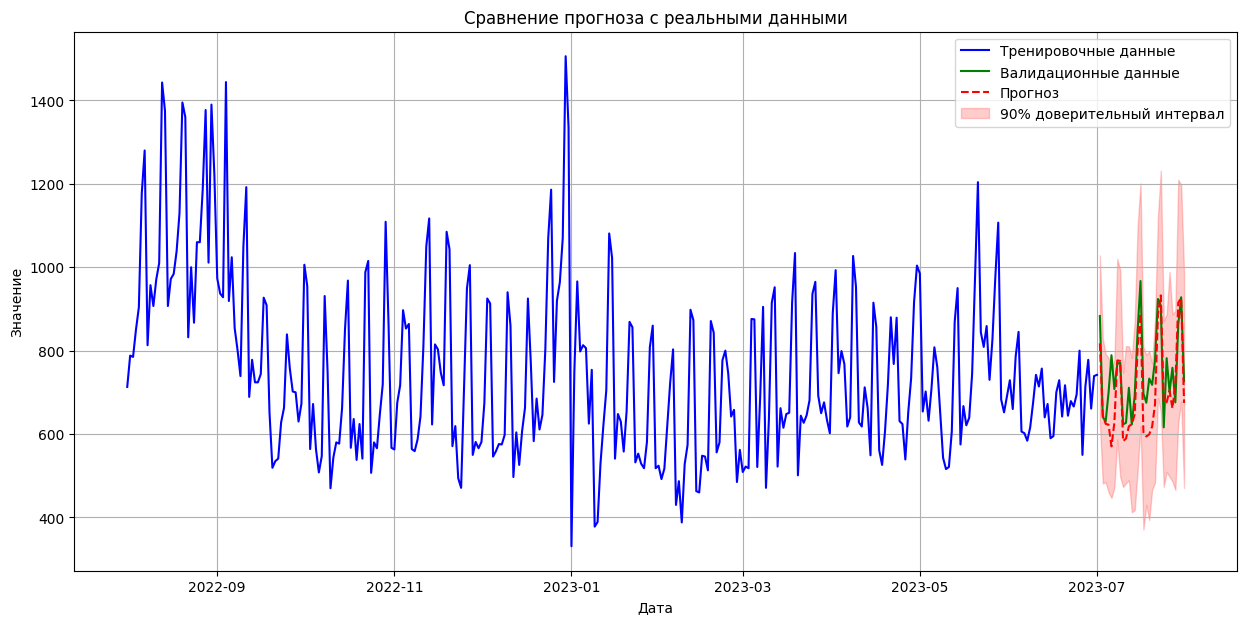

MAPE: 7.99%


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

df = data5.copy()
# Разделение данных
df['date'] = pd.to_datetime(df['date'])
valid_length = 30  # последний месяц на валидацию
train_data = df.iloc[:-valid_length].copy()
valid_data = df.iloc[-valid_length:].copy()

# Подготовка тренировочных данных для GluonTS
train_values = train_data['value'].values
train_timestamps = train_data['date']

training_data = ListDataset(
    [
        {
            "target": train_values,
            "start": train_timestamps[0]
        }
    ],
    freq="D"
)

# Настройка и обучение модели
model = MoiraiMoEForecast(
    module=MoiraiMoEModule.from_pretrained(
        f"Salesforce/moirai-moe-1.0-R-{SIZE}",
    ),
    prediction_length=valid_length,
    context_length=CTX,
    patch_size=16,
    num_samples=100,
    target_dim=1,
    feat_dynamic_real_dim=0,
    past_feat_dynamic_real_dim=0,
)

# Получение прогноза
predictor = model.create_predictor(batch_size=BSZ)
forecasts = list(predictor.predict(training_data))

# Получение предсказанных значений (среднее по всем сэмплам)
forecast_values = forecasts[0].mean
valid_values = valid_data['value'].values

# Расчет RMSE
rmse = np.sqrt(mean_squared_error(valid_values, forecast_values))
print(f'RMSE: {rmse:.2f}')

# Визуализация результатов
plt.figure(figsize=(15, 7))
# Исторические данные
plt.plot(train_data['date'], train_data['value'], 
         label='Тренировочные данные', color='blue')
# Валидационные данные
plt.plot(valid_data['date'], valid_data['value'], 
         label='Валидационные данные', color='green')
# Прогноз
forecast_dates = pd.date_range(start=train_timestamps.iloc[-1], 
                             periods=valid_length + 1, freq='D')[1:]
plt.plot(forecast_dates, forecast_values, 
         label='Прогноз', color='red', linestyle='--')

# Доверительный интервал
plt.fill_between(forecast_dates, 
                 forecasts[0].quantile(0.05), 
                 forecasts[0].quantile(0.95),
                 color='red', alpha=0.2, 
                 label='90% доверительный интервал')

plt.title('Сравнение прогноза с реальными данными')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Дополнительно выведем относительную ошибку в процентах
mape = np.mean(np.abs((valid_values - forecast_values) / valid_values)) * 100
print(f'MAPE: {mape:.2f}%')